In [3]:
#Naive Bayes approach - Fake-news detection - ALDA project - Group 3
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import re
from nltk.corpus import stopwords
# import word2vec
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


news_data = pd.read_csv("/Users/akhilesh/Desktop/news_dataset.csv")
# print(news_data.head(5))
news_data['label'] = news_data['category'].apply(lambda x: 0 if x=='real' else 1)
# print(news_data.head(5))

#Removing all the unwanted nonwords, numbers, articles removed using refineWords
def refineWords(s):
    letters_only = re.sub("[^a-zA-Z]", " ", s)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    #print( " ".join( meaningful_words ))
    return( " ".join( meaningful_words ))

news_data["content"].fillna(" ", inplace=True)
news_data["content"] = news_data["content"].apply(refineWords)
news_data["title"].fillna(" ", inplace=True)
news_data["title"] = news_data["title"].apply(refineWords)
news_data["publication"].fillna(" ", inplace=True)
news_data["publication"] = news_data["publication"].apply(refineWords)
news_data.to_csv('news_dataset.csv', encoding='utf-8')
print("The shape of the dataset after processing:")
print(news_data.shape)

The shape of the dataset after processing:
(28711, 7)


Accuracy:  0.8553021069127633
Precision:  0.9244131455399061
Recall:  0.7461159530125048
F-Score: 0.8257496330467603
RoC_AUC: 0.8471236981557368


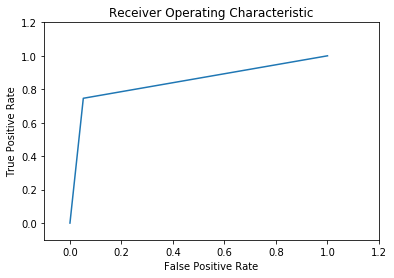

In [8]:
X_train, X_test, y_train, y_test = train_test_split(news_data['content'], news_data['label'], test_size=0.2, random_state=1)

#CountVectorizer creates a vector of word counts for each of the content/title to form the matrix
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions))
print('F-Score:', (2*precision_score(y_test, predictions)*recall_score(y_test, predictions))/(precision_score(y_test, predictions)+recall_score(y_test, predictions)))
labels = ['Real News', 'Fake News']
cm = confusion_matrix(y_test, predictions)
print('RoC_AUC:', roc_auc_score(y_test, predictions))
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('a.png')
plt.show()


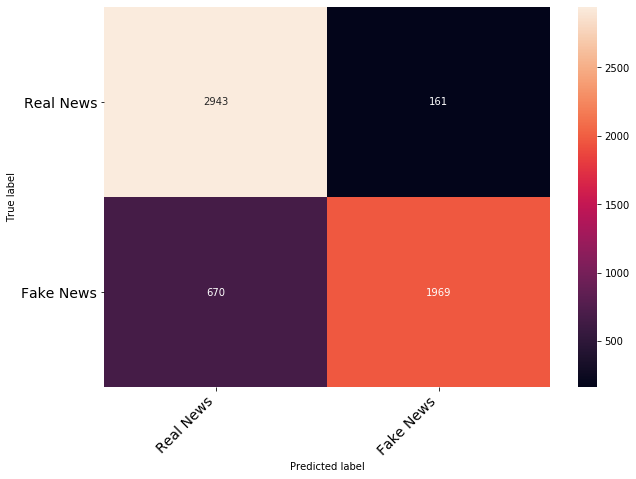

In [19]:
figsize = (10,7)
fontsize=14
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')





# sns.set(font_scale=1.4)
# sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, annot_kws={"size": 16})
# plt.xlabel('Real values')
# plt.ylabel('prediction')
# # plt.ticklabel_format(useOffset=False)
plt.show()